In [ ]:

!python --version

Python 3.10.12


## Loading dataset

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

In [ ]:
!kaggle datasets download -d stackoverflow/stacksample

100% 1.11G/1.11G [00:41<00:00, 31.8MB/s]
100% 1.11G/1.11G [00:41<00:00, 28.8MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/stacksample.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Qdf = pd.read_csv('/content/Questions.csv', encoding = "ISO-8859-1")
Tdf = pd.read_csv('/content/Tags.csv', encoding = "ISO-8859-1")

In [ ]:
Qdf1 = Qdf.copy()
Tdf1 = Tdf.copy()

In [ ]:
Qdf1.head()

Id  OwnerUserId          CreationDate            ClosedDate  Score  \
0   80         26.0  2008-08-01T13:57:07Z                   NaN     26   
1   90         58.0  2008-08-01T14:41:24Z  2012-12-26T03:45:49Z    144   
2  120         83.0  2008-08-01T15:50:08Z                   NaN     21   
3  180    2089740.0  2008-08-01T18:42:19Z                   NaN     53   
4  260         91.0  2008-08-01T23:22:08Z                   NaN     49   

                                               Title  \
0  SQLStatement.execute() - multiple queries in o...   
1  Good branching and merging tutorials for Torto...   
2                                  ASP.NET Site Maps   
3                 Function for creating color wheels   
4  Adding scripting functionality to .NET applica...   

                                                Body  
0  <p>I've written a database generation script i...  
1  <p>Are there any really good tutorials explain...  
2  <p>Has anyone got experience creating <strong>...  
3  <p>This is something I've pseudo-solved many t...  
4  <p>I have a little game written in C#. It uses...

In [ ]:
df1 = Qdf[:421405]
df1.to_csv('QPart1.csv')

In [ ]:
Tdf1.head()

Id             Tag
0  80            flex
1  80  actionscript-3
2  80             air
3  90             svn
4  90     tortoisesvn

In [ ]:
Qdf1.shape , Tdf1.shape

((1264216, 7), (3750994, 2))

In [ ]:
Qdf1.columns

Index(['Id', 'OwnerUserId', 'CreationDate', 'ClosedDate', 'Score', 'Title',
       'Body'],
      dtype='object')

In [ ]:
Qdf1 = Qdf1.drop(['OwnerUserId', 'CreationDate', 'ClosedDate'],axis=1)

In [ ]:
Tdf1['Tag'] = Tdf1['Tag'].astype(str)
grouped_tags = Tdf1.groupby("Id")['Tag'].apply(lambda tags: ' '.join(tags))
grouped_tags.head(5)

Id
80                            flex actionscript-3 air
90       svn tortoisesvn branch branching-and-merging
120                               sql asp.net sitemap
180    algorithm language-agnostic colors color-space
260           c# .net scripting compiler-construction
Name: Tag, dtype: object

In [ ]:
grouped_tags.reset_index()

Id                                             Tag
0              80                         flex actionscript-3 air
1              90    svn tortoisesvn branch branching-and-merging
2             120                             sql asp.net sitemap
3             180  algorithm language-agnostic colors color-space
4             260         c# .net scripting compiler-construction
...           ...                                             ...
1264211  40143210                                   php .htaccess
1264212  40143300                                 google-bigquery
1264213  40143340                          android android-studio
1264214  40143360                               javascript vue.js
1264215  40143380                                 npm mocha babel

[1264216 rows x 2 columns]

In [ ]:
grouped_tags_final = pd.DataFrame({'Id':grouped_tags.index, 'Tags':grouped_tags.values})
grouped_tags_final.head()

Id                                            Tags
0   80                         flex actionscript-3 air
1   90    svn tortoisesvn branch branching-and-merging
2  120                             sql asp.net sitemap
3  180  algorithm language-agnostic colors color-space
4  260         c# .net scripting compiler-construction

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Combine all tags into a single string
all_tags = ' '.join(grouped_tags_final['Tags'])

## EDA

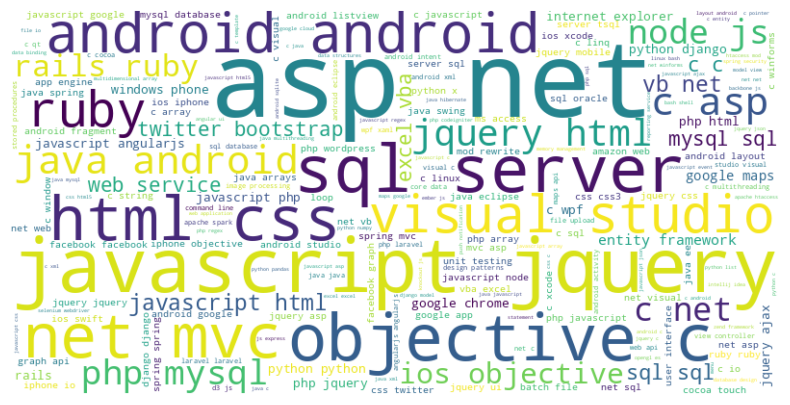

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
all_tags = grouped_tags_final['Tags'].str.split(', ').explode()
tag_counts = all_tags.value_counts()

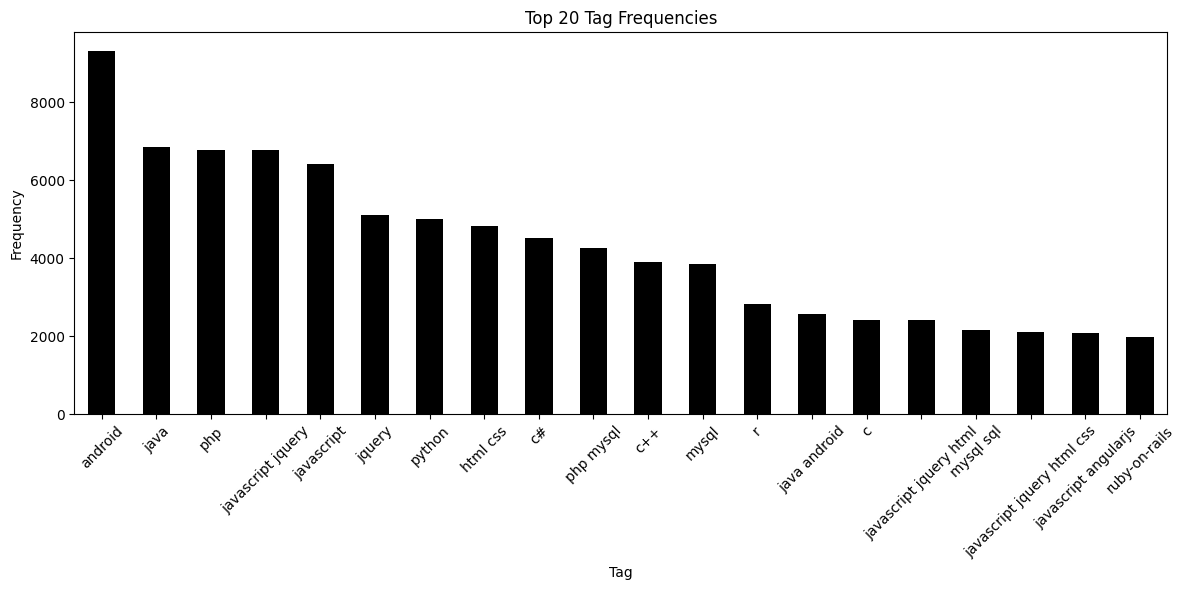

In [ ]:
plt.figure(figsize=(12, 6))
tag_counts[:20].plot(kind='bar', color='black')
plt.title('Top 20 Tag Frequencies')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Preprocessing

In [ ]:
df = Qdf1.merge(grouped_tags_final, on='Id')
df.head(5)

Id  Score                                              Title  \
0   80     26  SQLStatement.execute() - multiple queries in o...   
1   90    144  Good branching and merging tutorials for Torto...   
2  120     21                                  ASP.NET Site Maps   
3  180     53                 Function for creating color wheels   
4  260     49  Adding scripting functionality to .NET applica...   

                                                Body  \
0  <p>I've written a database generation script i...   
1  <p>Are there any really good tutorials explain...   
2  <p>Has anyone got experience creating <strong>...   
3  <p>This is something I've pseudo-solved many t...   
4  <p>I have a little game written in C#. It uses...   

                                             Tags  
0                         flex actionscript-3 air  
1    svn tortoisesvn branch branching-and-merging  
2                             sql asp.net sitemap  
3  algorithm language-agnostic colors color-space  
4         c# .net scripting compiler-construction

In [ ]:
new_df = df[df['Score']>8]
new_df.info

<bound method DataFrame.info of                Id  Score                                              Title  \
0              80     26  SQLStatement.execute() - multiple queries in o...   
1              90    144  Good branching and merging tutorials for Torto...   
2             120     21                                  ASP.NET Site Maps   
3             180     53                 Function for creating color wheels   
4             260     49  Adding scripting functionality to .NET applica...   
...           ...    ...                                                ...   
1257356  39981800     11  How to achieve test isolation with Symfony for...   
1260386  40053550      9  The compiler suggests I add a 'static lifetime...   
1261242  40073530     16  Why doesn't ${@:-1} return the last element of...   
1262332  40098470     19  If multiple classes have a static variable in ...   
1262668  40106430     14   Using lambda in default initializer gcc vs clang   

                   

In [ ]:
new_df.isna().sum()

Id       0
Score    0
Title    0
Body     0
Tags     0
dtype: int64

In [ ]:
new_df.duplicated().sum()

0

In [ ]:
new_df = new_df.drop(['Id', 'Score'],axis=1)

In [ ]:
new_df['Tags'] = new_df['Tags'].apply(lambda x: x.split())

In [ ]:
all_tags = [item for sublist in new_df['Tags'].values for item in sublist]
len(all_tags)

129631

In [ ]:
all_tags

['flex',
 'actionscript-3',
 'air',
 'svn',
 'tortoisesvn',
 'branch',
 'branching-and-merging',
 'sql',
 'asp.net',
 'sitemap',
 'algorithm',
 'language-agnostic',
 'colors',
 'color-space',
 'c#',
 '.net',
 'scripting',
 'compiler-construction',
 'c++',
 'oop',
 'class',
 'nested-class',
 '.net',
 'web-services',
 'sql-server',
 'sql-server-2005',
 'deployment',
 'release-management',
 'c#',
 'visual-studio',
 'versioning',
 'windows',
 'visual-studio',
 'registry',
 'installation',
 'c#',
 'database',
 'loops',
 'connection',
 'c#',
 'asp.net',
 'c#',
 'file-locking',
 'unix',
 'size',
 'svn',
 'msbuild',
 'cruisecontrol.net',
 'web-applications',
 'dns',
 'subdomain',
 'account',
 '.net',
 '.net-3.5',
 'msbuild',
 'nant',
 'sql-server',
 'windows-server-2008',
 'sql-server',
 'sql-server-2008',
 'sql-server',
 'c#',
 '.net',
 'unit-testing',
 'testing',
 'svn',
 'version-control',
 'sql',
 'database',
 'postgresql',
 'stored-procedures',
 'triggers',
 'sql',
 'sql-server',
 'c#',
 

In [ ]:
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

11282

In [ ]:
import nltk

In [ ]:
flat_list = [item for sublist in new_df['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]
tags_features

['java',
 'c#',
 'javascript',
 'android',
 'python',
 'c++',
 '.net',
 'php',
 'jquery',
 'ios',
 'html',
 'css',
 'iphone',
 'objective-c',
 'c',
 'ruby-on-rails',
 'sql',
 'ruby',
 'mysql',
 'asp.net',
 'git',
 'r',
 'asp.net-mvc',
 'linux',
 'angularjs',
 'string',
 'node.js',
 'sql-server',
 'performance',
 'django',
 'xcode',
 'eclipse',
 'algorithm',
 'arrays',
 'wpf',
 'windows',
 'haskell',
 'c++11',
 'scala',
 'visual-studio',
 'json',
 'multithreading',
 'bash',
 'regex',
 'swift',
 'osx',
 'html5',
 'database',
 'unit-testing',
 'xml',
 'spring',
 'cocoa-touch',
 'ajax',
 'ruby-on-rails-3',
 'visual-studio-2010',
 'debugging',
 'vim',
 'linq',
 'entity-framework',
 'shell',
 'twitter-bootstrap',
 'postgresql',
 'mongodb',
 'winforms',
 'list',
 'cocoa',
 'generics',
 'google-chrome',
 'css3',
 'maven',
 'oop',
 'asp.net-mvc-3',
 'perl',
 'http',
 'gcc',
 'delphi',
 'templates',
 'svn',
 'tsql',
 'image',
 'github',
 'rest',
 'security',
 'exception',
 'facebook',
 'math',
 

In [ ]:
import pickle
with open('tags_feature.pkl','wb') as f:
  pickle.dump(tags_features,f)

In [ ]:
def most_common(tags):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

In [ ]:
new_df['Tags'] = new_df['Tags'].apply(lambda x: most_common(x))
new_df['Tags'] = new_df['Tags'].apply(lambda x: x if len(x)>0 else None)
new_df.shape

(42395, 3)

In [ ]:
new_df.dropna(subset=['Tags'], inplace=True)
print(new_df.shape)
new_df.head()

(37075, 3)


Title  \
1  Good branching and merging tutorials for Torto...   
2                                  ASP.NET Site Maps   
3                 Function for creating color wheels   
4  Adding scripting functionality to .NET applica...   
5          Should I use nested classes in this case?   

                                                Body               Tags  
1  <p>Are there any really good tutorials explain...              [svn]  
2  <p>Has anyone got experience creating <strong>...     [sql, asp.net]  
3  <p>This is something I've pseudo-solved many t...        [algorithm]  
4  <p>I have a little game written in C#. It uses...         [c#, .net]  
5  <p>I am working on a collection of classes use...  [c++, oop, class]

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
new_df['Body'] = new_df['Body'].apply(lambda x: BeautifulSoup(x).get_text())
new_df.head()

Title  \
1  Good branching and merging tutorials for Torto...   
2                                  ASP.NET Site Maps   
3                 Function for creating color wheels   
4  Adding scripting functionality to .NET applica...   
5          Should I use nested classes in this case?   

                                                Body               Tags  
1  Are there any really good tutorials explaining...              [svn]  
2  Has anyone got experience creating SQL-based A...     [sql, asp.net]  
3  This is something I've pseudo-solved many time...        [algorithm]  
4  I have a little game written in C#. It uses a ...         [c#, .net]  
5  I am working on a collection of classes used f...  [c++, oop, class]

In [ ]:
from nltk.tokenize import ToktokTokenizer

In [ ]:
token=ToktokTokenizer()

In [ ]:
import string

In [ ]:
def remove_punctuation(text):
    words=token.tokenize(text)
    filtered=[]
    for w in words:
        if w not in tags_features:
            new_w=w.translate(str.maketrans('', '', string.punctuation))
            filtered.append(new_w)
        else:
            filtered.append(w)
    s = " "
    s=s.join(filtered)
    return s


In [ ]:
text="I have issue with pandas and c# immitation. / "
words=token.tokenize(text)
filtered=[]
for w in words:
    if w not in tags_features:
        new_w=w.translate(str.maketrans('', '', string.punctuation))
        filtered.append(new_w)
    else:
        filtered.append(w)
print(filtered)
s = " "
s=s.join(filtered)
print(s)
print("Working well......................")

['I', 'have', 'issue', 'with', 'pandas', 'and', 'c#', 'immitation', '']
I have issue with pandas and c# immitation 
Working well......................


In [ ]:
import re

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [ ]:
new_df['Body'] = new_df['Body'].apply(lambda x: clean_text(x))

In [ ]:
new_df['Body']= new_df['Body'].apply(lambda x: re.sub('<[^<]+?>','',x))
new_df.head()

Title  \
1  Good branching and merging tutorials for Torto...   
2                                  ASP.NET Site Maps   
3                 Function for creating color wheels   
4  Adding scripting functionality to .NET applica...   
5          Should I use nested classes in this case?   

                                                Body               Tags  
1  are there any really good tutorials explaining...              [svn]  
2  has anyone got experience creating sql-based a...     [sql, asp.net]  
3  this is something i have pseudo-solved many ti...        [algorithm]  
4  i have a little game written in c#. it uses a ...         [c#, .net]  
5  i am working on a collection of classes used f...  [c++, oop, class]

In [ ]:
new_df['Body'] = new_df['Body'].apply(lambda x: remove_punctuation(x))

In [ ]:
new_df['Body'][10]

'what is the simplest way to connect and query a database for a set of records in c# '

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
lemma = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

In [ ]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):

    stop_words = set(stopwords.words("english"))

    words=token.tokenize(text)

    filtered = [w for w in words if not w in stop_words]

    return ' '.join(map(str, filtered))

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
new_df['Body'] = new_df['Body'].apply(lambda x: lemitizeWords(x))
new_df['Body'] = new_df['Body'].apply(lambda x: stopWordsRemove(x))

In [ ]:
new_df['Title'] = new_df['Title'].apply(lambda x: str(x))
new_df['Title'] = new_df['Title'].apply(lambda x: clean_text(x))
new_df['Title'] = new_df['Title'].apply(lambda x: remove_punctuation(x))
new_df['Title'] = new_df['Title'].apply(lambda x: lemitizeWords(x))
new_df['Title'] = new_df['Title'].apply(lambda x: stopWordsRemove(x))

In [ ]:
new_df.head()

Title  \
1     good branch merge tutorials tortoisesvn   
2                            asp.net site map   
3                 function create color wheel   
4  add script functionality .net applications   
5                         use nest class case   

                                                Body               Tags  
1  really good tutorials explain branch merge apa...              [svn]  
2  anyone get experience create sqlbased asp.net ...     [sql, asp.net]  
3  something pseudosolved many time never quite f...        [algorithm]  
4  little game write c use database backend trade...         [c#, .net]  
5  work collection class use video playback recor...  [c++, oop, class]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Vectorization

In [ ]:
new_df['Title']= new_df['Title'].astype(str)
vectorizer = TfidfVectorizer(max_features=5000)
X1 = vectorizer.fit_transform(new_df['Title'].str.lower())

In [ ]:
new_df['Body']= new_df['Body'].astype(str)
X2 = vectorizer.fit_transform(new_df['Body'].str.lower())

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
y = new_df['Tags']
multilabel_binarizer = MultiLabelBinarizer()
new_y = multilabel_binarizer.fit_transform(y)

In [ ]:
import pickle
with open('label.pkl','wb') as f:
  pickle.dump(multilabel_binarizer,f)

In [ ]:
new_y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from scipy.sparse import hstack

In [ ]:
X=hstack([X1,X2])

In [ ]:
X

<37075x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 1584037 stored elements in Compressed Sparse Row format>

In [ ]:
import pickle
with open('TokToktokenizer.pkl','wb') as f:
  pickle.dump(token,f)

In [ ]:
import pickle
with open('tfidfVector.pkl','wb') as f:
  pickle.dump(vectorizer,f)

In [ ]:
import pickle
with open('WordLemma.pkl','wb') as f:
  pickle.dump(lemma,f)

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size = 0.3, random_state = 42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25952, 10000) (11123, 10000) (25952, 100) (11123, 100)


In [ ]:
from sklearn.metrics import hamming_loss

In [ ]:
def print_score(y_pred, clf):
    print("Classifier: ", clf.__class__.__name__)
    jacard = np.minimum(y_test,y_pred).sum(axis=1) / np.maximum(y_test,y_pred).sum(axis=1)
    score=jacard.mean()*100
    print("Jacard score: {}".format(score))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    F1_Score=metrics.classification_report(y_test, y_pred).split()[-2]
    print('F1 Score of ',clf.__class__.__name__,":", F1_Score)
    print("-----------------------------------------------------------")
    return F1_Score

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegression, PassiveAggressiveClassifier, Perceptron
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

## Training and Testing Model

In [ ]:
from tqdm import tqdm
sgd = SGDClassifier()
lr = LogisticRegression()
# rf = RandomForestClassifier()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()
Scores={}
for classifier in [sgd, lr, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score=print_score(y_pred, classifier)
    Scores[classifier]=score

Classifier:  SGDClassifier
Jacard score: 49.12418711978184
Hamming loss: 0.9476759866942371
F1 Score of  SGDClassifier : 0.54
-----------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier:  LogisticRegression
Jacard score: 42.51176241421678
Hamming loss: 1.041086037939405
F1 Score of  LogisticRegression : 0.47
-----------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier:  LinearSVC
Jacard score: 53.04788875902785
Hamming loss: 0.9718601096826396
F1 Score of  LinearSVC : 0.59
-----------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier:  Perceptron
Jacard score: 49.21875735819816
Hamming loss: 1.2774431358446463
F1 Score of  Perceptron : 0.56
-----------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier:  PassiveAggressiveClassifier
Jacard score: 50.85126057975109
Hamming loss: 1.1780095298031108
F1 Score of  PassiveAggressiveClassifier : 0.58
-----------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pickle

In [ ]:
with open('clf.pkl', 'wb') as f:
    pickle.dump(clf, f)

#Prediction

In [ ]:
import pandas as pd

predData = {
    "title": ["serialization/deserialization using Java in python"],
    "body": ["trying python to serialize Python and deserialize from class object to Python using Java package. After looking into some documentation succeeded in Java the json class object but, when json out with complex class am not able to deserialize json  objects"]
}

pData = pd.DataFrame(predData)
pData.head()


title  \
0  serialization/deserialization using Java in py...   

                                                body  
0  trying python to serialize Python and deserial...

In [ ]:
pData['body'] = pData['body'].apply(lambda x: BeautifulSoup(x).get_text())
pData['body'] = pData['body'].apply(lambda x: clean_text(x))
pData['body']= pData['body'].apply(lambda x: re.sub('<[^<]+?>','',x))
pData['body'] = pData['body'].apply(lambda x: remove_punctuation(x))
pData['body'] = pData['body'].apply(lambda x: lemitizeWords(x))
pData['body'] = pData['body'].apply(lambda x: stopWordsRemove(x))

In [ ]:
pData['title'] = pData['title'].apply(lambda x: str(x))
pData['title'] = pData['title'].apply(lambda x: clean_text(x))
pData['title'] = pData['title'].apply(lambda x: remove_punctuation(x))
pData['title'] = pData['title'].apply(lambda x: lemitizeWords(x))
pData['title'] = pData['title'].apply(lambda x: stopWordsRemove(x))
pData['title']= pData['title'].astype(str)

In [ ]:
pData['title']

0    serializationdeserialization use java python
Name: title, dtype: object

In [ ]:
pData['body']

0    try python serialize python deserialize class ...
Name: body, dtype: object

In [ ]:
with open('/content/tfidfVector.pkl', 'rb') as f:
    vecto = pickle.load(f)

In [ ]:
X1_pred = vecto.transform(pData['title'].str.lower())
X2_pred = vecto.transform(pData['body'].str.lower())

In [ ]:
# pData['body']= pData['body'].astype(str)

In [ ]:
# X2 = vectorizer.fit_transform(pData['body'].str.lower())

In [ ]:
X1_pred.shape

(1, 5000)

In [ ]:
X2_pred.shape

(1, 5000)

In [ ]:
X_pred = hstack([X1_pred, X2_pred])

In [ ]:
with open('/content/clf.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [ ]:
prediction = loaded_model.predict(X_pred)

In [ ]:
prediction

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
predicted_labels = multilabel_binarizer.inverse_transform(prediction)
print(predicted_labels)

[('java', 'json', 'python')]
